In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as pl

## Criando dataframe

In [2]:
# construct from dictionary
d = {'col1': [1, 2], 'col2': [3, 4]}

df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [3]:
# Constructing DataFrame from a dictionary including Series:

d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[1, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,col1,col2
0,0,NaN
1,1,2.0
2,2,NaN
3,3,3.0


In [4]:
#Constructing DataFrame from numpy ndarray:

df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [5]:
# add column

df2['d'] = [10,11,12]
df2

,a,b,c,d
0,1,2,3,10
1,4,5,6,11
2,7,8,9,12


Este tutorial de como usar o módulo pandas aplicado no contexto de análise de vendas de uma loja de tecnologia é uma tradução/adaptação do tutorial do vídeo "Solving real world data science tasks with Python Pandas!" do canal Keith Galli.

https://www.youtube.com/watch?v=eMOA1pPVUc4&pbjreload=101

In [2]:
df = pd.read_csv("./Data Science/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

print(len(df))
df.head()

18383


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
files = [file for file in os.listdir('./Data Science/SalesAnalysis/Sales_Data')]

#coloca tudo nesse frame
all_data = pd.DataFrame()

for file in files:
    print(file)
    df = pd.read_csv("./Data Science/SalesAnalysis/Sales_Data/"+file)
    all_data = pd.concat([all_data, df])
    
print('\ntamanho:', len(all_data),'linhas')

#salva tudo junto
#all_data.to_csv('./Data Science/SalesAnalysis/all_data.csv',index=False)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv

tamanho: 186850 linhas


In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###  Clean Data

In [91]:
#encontrar os NAN
nan_df = all_data[all_data.isna().any(axis=1)]
#nan_df.head()

In [6]:
#limpa todos os NAN
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
#ignora as linhas duplicadas
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

### Add month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add sales column

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add city column

In [10]:
#usando o método .apply (aplica função em toda uma coluna)

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' +x.split(',')[2].split(' ')[1])

#apaga colunas que não vamos usar mais
all_data = all_data.drop(columns='Purchase Address')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,11.99,Los Angeles CA


In [ ]:
#outro exemplo de como fazer a célula acima (usando f'strings)

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{x.split(',')[1]} {x.split(',')[2].split(' ')[1]}')

### Best month for sales?

In [97]:
results=all_data.groupby('Month').sum()
results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


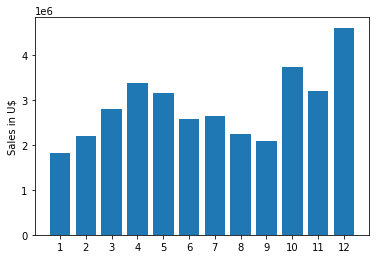

In [98]:
months = range(1,13)

pl.bar(months, results['Sales'])
pl.xticks(months)
pl.ylabel('Sales in U$')

pl.show()

### What city buys more?

In [99]:
results=all_data.groupby('City').sum()
results.head(12)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


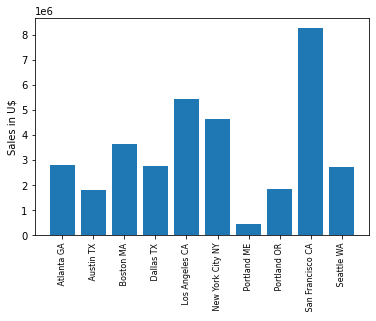

In [100]:
#organiza as cidades na mesma ordem que o agrupamento anterior
cities = [city for city,df in all_data.groupby('City')]

pl.bar(cities, results['Sales'])
pl.xticks(cities,rotation='vertical', size=8)
pl.ylabel('Sales in U$')

pl.show()

### What time to display adds?

In [104]:
#vamos tratar a hora do dia como um objeto de horário

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [105]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,Los Angeles CA,9


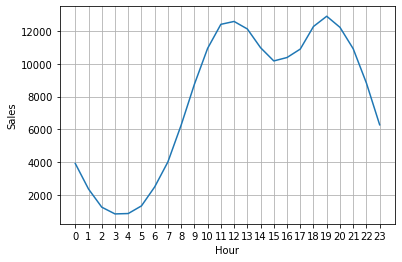

In [125]:
results=all_data.groupby('Hour').count()

hours = [city for city,df in all_data.groupby('Hour')]

pl.plot(hours, results['Sales'])
pl.xticks(hours)
pl.xlabel('Hour')
pl.ylabel('Sales')
pl.grid()

pl.show()

### What Products are sold together 

In [115]:
#procura células com mesmo ID de compra
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Group'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Group']].drop_duplicates()

df.head()

c:\users\medou\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [120]:
from itertools import combinations
from collections import Counter

#contar as combinações de 2 itens
count = Counter()
for row in df['Group']:
    row_list = row.split(',')
    count.update(combinations(row_list,2))
    
for key, value in count.most_common(10):
    print(value,' - ',key)


1005  -  ('iPhone', 'Lightning Charging Cable')
987  -  ('Google Phone', 'USB-C Charging Cable')
447  -  ('iPhone', 'Wired Headphones')
414  -  ('Google Phone', 'Wired Headphones')
361  -  ('Vareebadd Phone', 'USB-C Charging Cable')
360  -  ('iPhone', 'Apple Airpods Headphones')
220  -  ('Google Phone', 'Bose SoundSport Headphones')
160  -  ('USB-C Charging Cable', 'Wired Headphones')
143  -  ('Vareebadd Phone', 'Wired Headphones')
92  -  ('Lightning Charging Cable', 'Wired Headphones')


### What sells more? 

In [203]:
results = all_data.groupby('Product').sum()

#organizar por quant. de vendas
results.sort_values(by=['Quantity Ordered'], inplace=True, ascending=False)
#print(results.index)

results.head()

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720


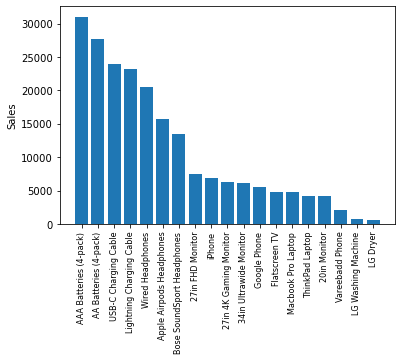

In [202]:
#organiza os produtoss na mesma ordem que o agrupamento anterior
prod = [prod for prod in results.index]


pl.bar(prod, results['Quantity Ordered'])
pl.xticks(prod,rotation='vertical', size=8)
pl.ylabel('Sales')
pl.show()



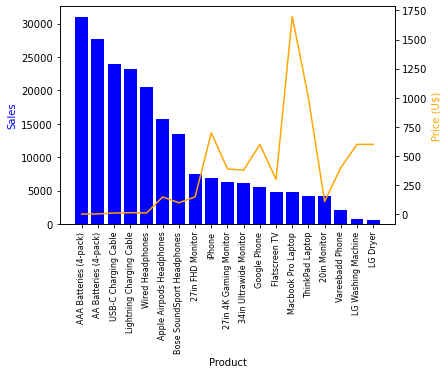

In [222]:
prices =  results['Price Each']/results['Quantity Ordered']

fig,ax1 = pl.subplots()

ax2 = ax1.twinx()
ax1.set_xticklabels(prod,rotation='vertical',size=8)
ax1.bar(prod, results['Quantity Ordered'],color='b')
ax2.plot(prod,prices,'b-',color='orange')

ax1.set_xlabel('Product')
ax1.set_ylabel('Sales',color='b')
ax2.set_ylabel('Price (U$)',color='orange')

pl.show()